In [1]:
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()

In [3]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


## 2. 샘플과 특성의 의미 
- 일반적으로 샘플을 행으로 넣고, 특성들을 열에 배치

In [4]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [5]:
diabetes.target[:3]

array([151.,  75., 141.])

## 3. 데이터 시각화

In [6]:
import matplotlib.pyplot as plt

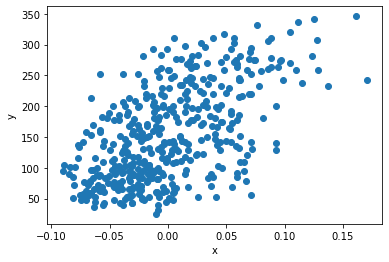

In [7]:
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
w = 1 
b = 1

In [9]:
x = diabetes.data[:, 2]
y = diabetes.target

In [10]:
for i in range(1, 1000):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
    print(w, b)

587.8654539985689 99.40935564531424
796.8938154365328 114.80085167130312
871.7846906736421 120.31533114511797
898.6166629246662 122.2910639663966
908.2300468329227 122.99893135435462
911.6743389372426 123.25254673875172
912.9083631074094 123.34341229393493
913.3504904318155 123.37596768933565
913.5088962197347 123.3876316665992
913.5656499923714 123.39181064719298
913.5859837866788 123.3933078962367
913.593268997366 123.39384433201303
913.5958791494085 123.39403652672056
913.5968143171038 123.39410538641867
913.5971493698534 123.3941300575352
913.5972694128634 123.39413889672572
913.5973124219838 123.39414206363907
913.5973278313324 123.39414319828379
913.5973333522078 123.39414360480532
913.5973353302317 123.3941437504542
913.5973360389196 123.3941438026374
913.5973362928291 123.39414382133366
913.5973363838004 123.39414382803218
913.5973364163933 123.39414383043211
913.5973364280701 123.39414383129193
913.5973364322543 123.39414383160003
913.5973364337536 123.39414383171042
913.59733

913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
913.5973364345905 123.39414383177204
9

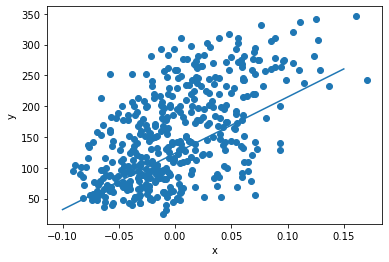

In [11]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

---
## 3. Neuron 클래스 생성

In [12]:
import time 

In [16]:
class Neuron:
    
    # 초기 설정
    
    def __init__(self):
        
        # 가중치 초기화 작업 수행 
        
        self.w = 1.0 # 가중치 초기화
        self.b = 1.0 # 절편 초기화
        
        
        
    # 메서드 추가 
    
    # 정방향 계산
    def forpass(self, x):
        y_hat = x * self.w + self.b
        
        return y_hat
    
    
    # 역방향 계산 메서드
    
    def backprop(self,x , err):
        w_grad = x * err
        b_grad = 1 * err
        
        return w_grad, b_grad
    
    
    def fit(self, x, y):
        epochs = int(input('epochs = '))
        for i in range(1, epochs):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i)
                err = -(y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산 
                self.w -= w_grad
                self.b -= b_grad
             
            if i % 10 == 0:
                print('epochs = {}'.format(i))
                plt.scatter(x, y)
                pt1 = (-0.1, -0.1 * self.w + self.b)
                pt2 = (0.15, 0.15 * self.w + self.b)
                plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
                plt.xlabel('x')
                plt.ylabel('y')
                plt.show()
                time.sleep(0.5)

                
        print(w, b)

epochs = 1000
epochs = 10


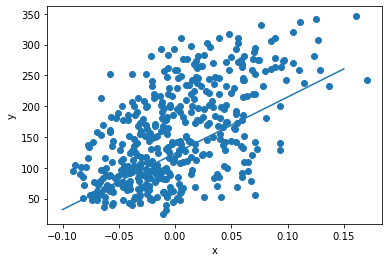

epochs = 20


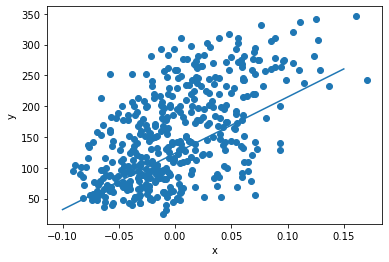

epochs = 30


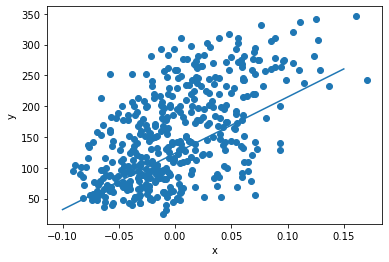

epochs = 40


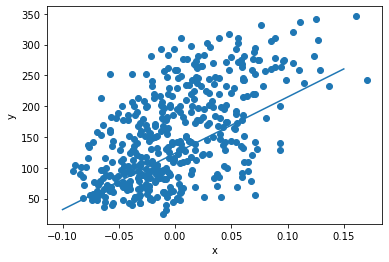

epochs = 50


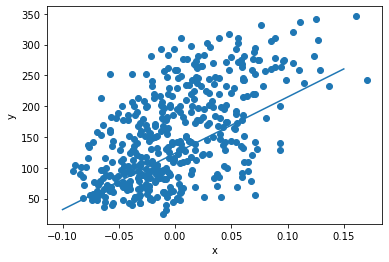

epochs = 60


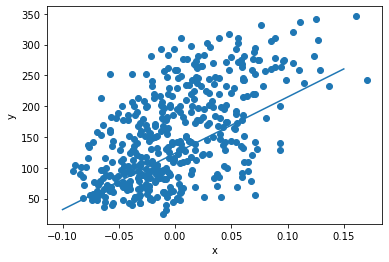

epochs = 70


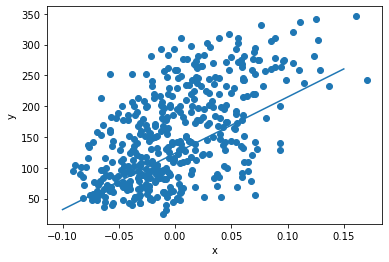

epochs = 80


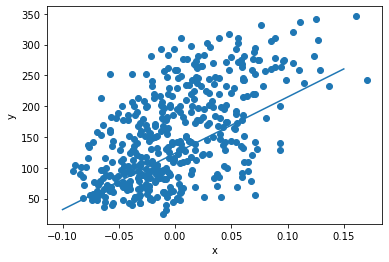

epochs = 90


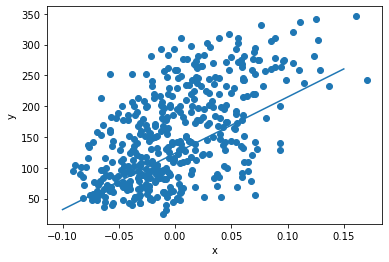

epochs = 100


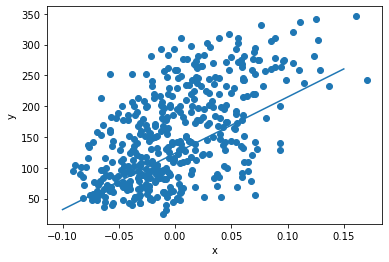

epochs = 110


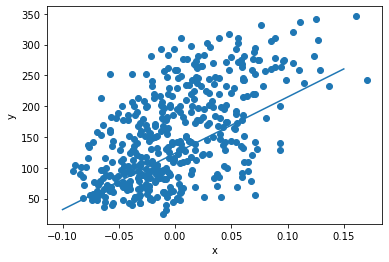

epochs = 120


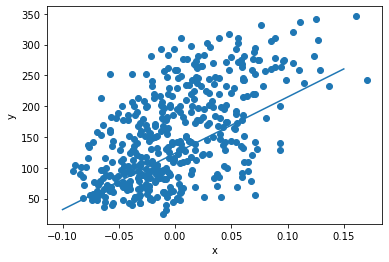

epochs = 130


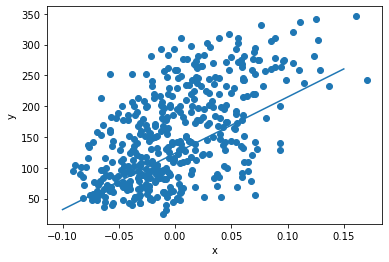

epochs = 140


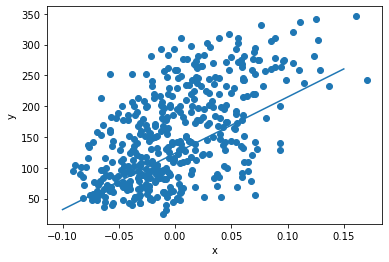

epochs = 150


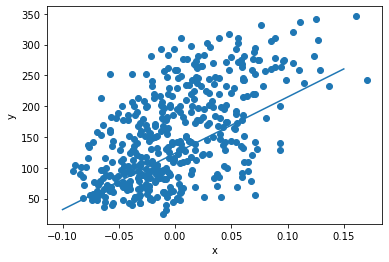

epochs = 160


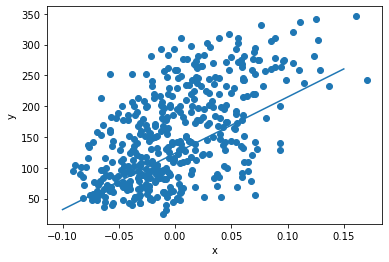

epochs = 170


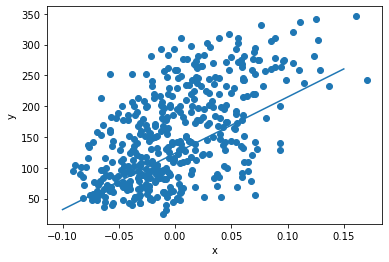

epochs = 180


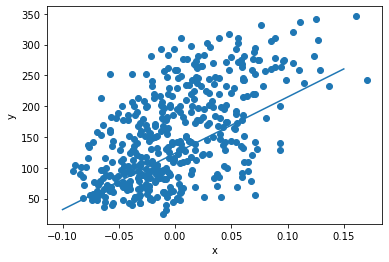

epochs = 190


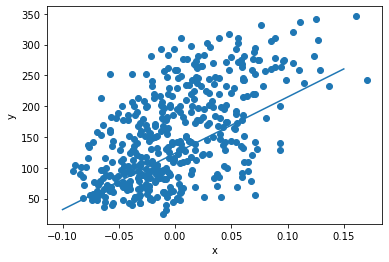

epochs = 200


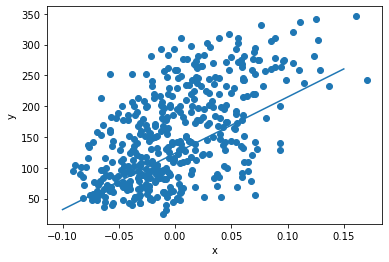

epochs = 210


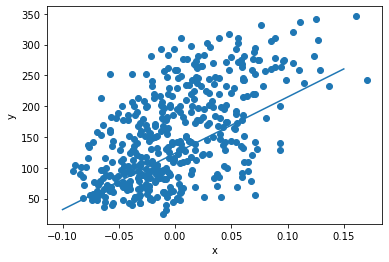

epochs = 220


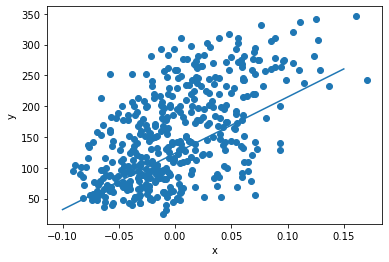

epochs = 230


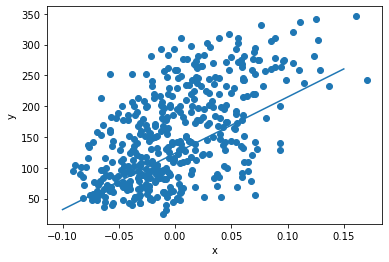

epochs = 240


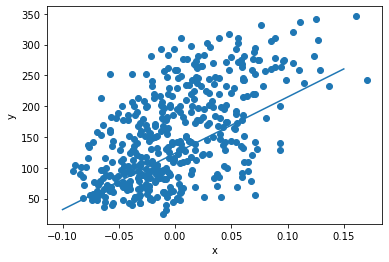

epochs = 250


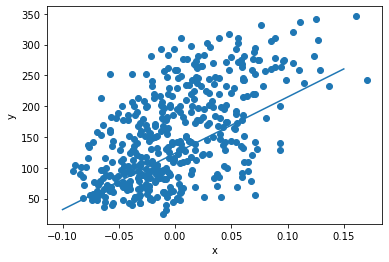

epochs = 260


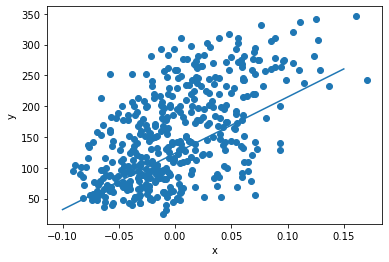

epochs = 270


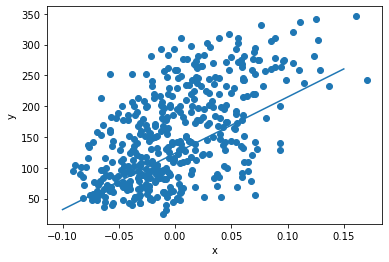

epochs = 280


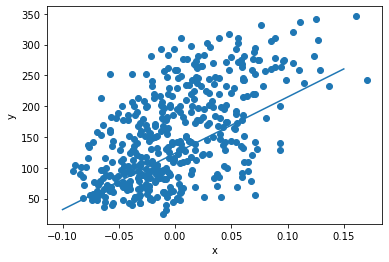

epochs = 290


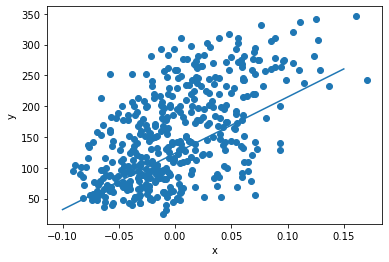

epochs = 300


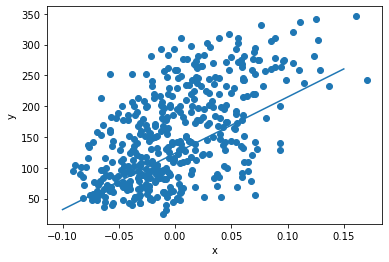

epochs = 310


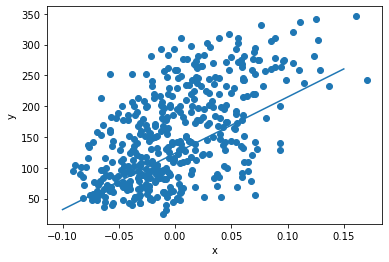

epochs = 320


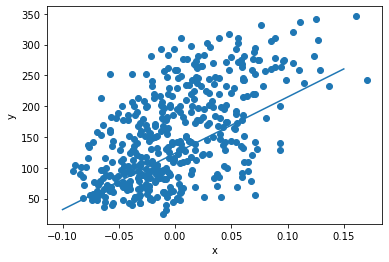

epochs = 330


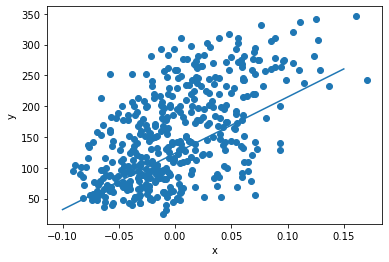

epochs = 340


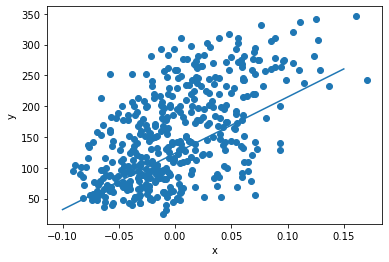

epochs = 350


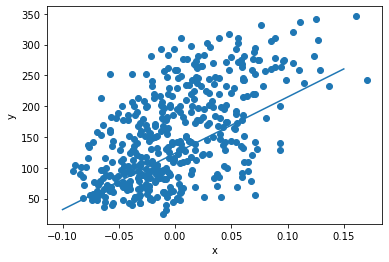

epochs = 360


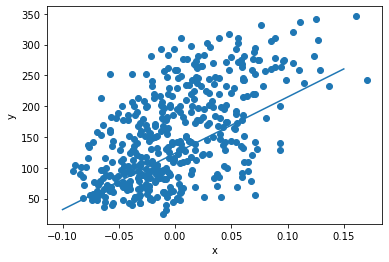

epochs = 370


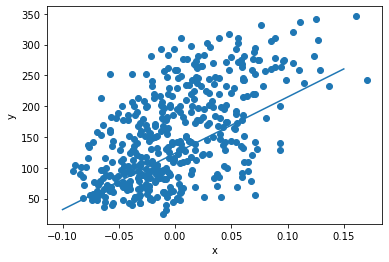

epochs = 380


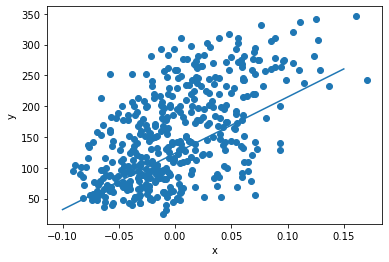

epochs = 390


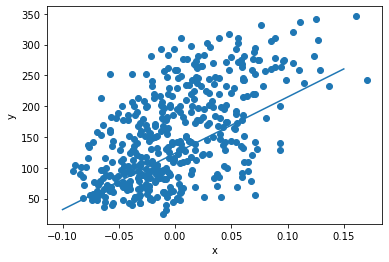

epochs = 400


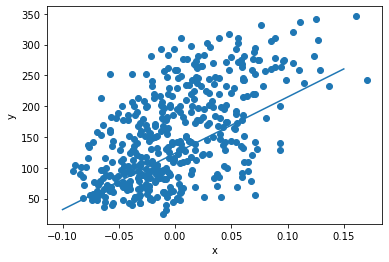

epochs = 410


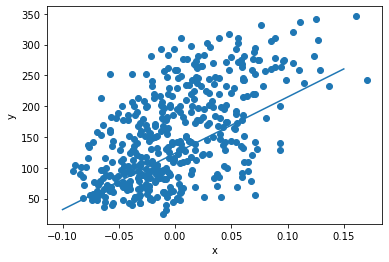

epochs = 420


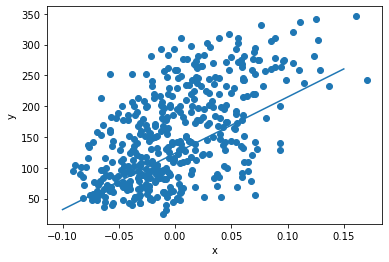

epochs = 430


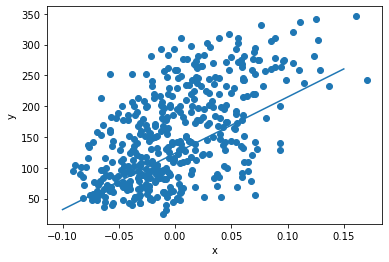

epochs = 440


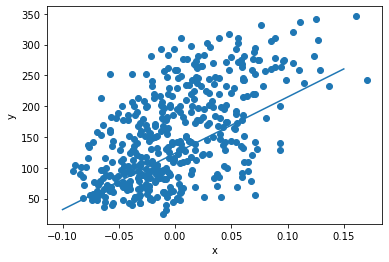

epochs = 450


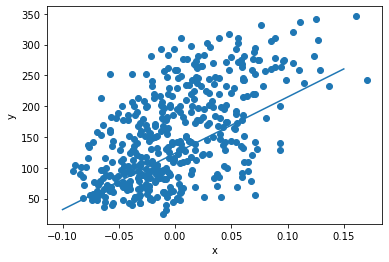

epochs = 460


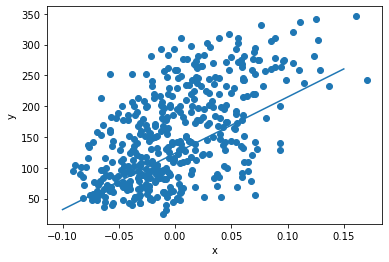

epochs = 470


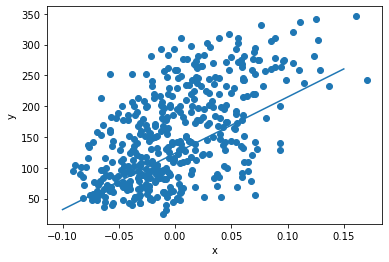

epochs = 480


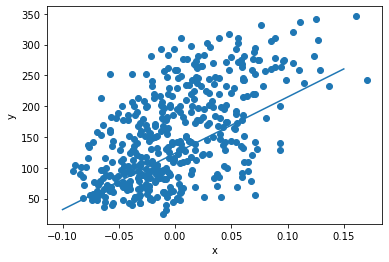

epochs = 490


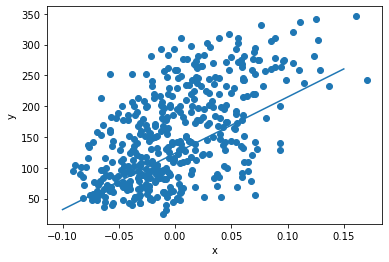

epochs = 500


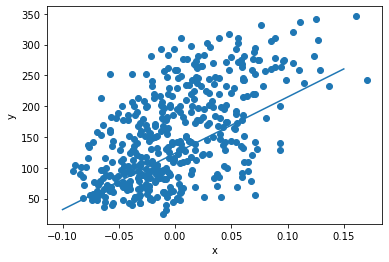

epochs = 510


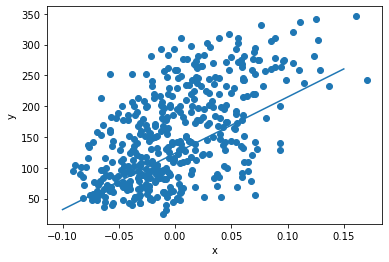

epochs = 520


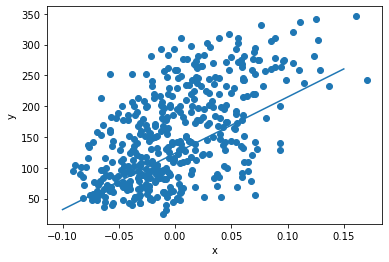

epochs = 530


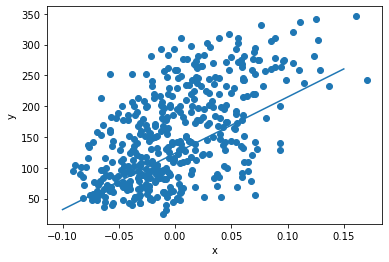

epochs = 540


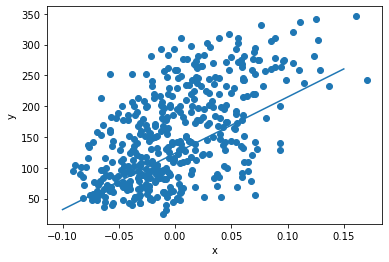

epochs = 550


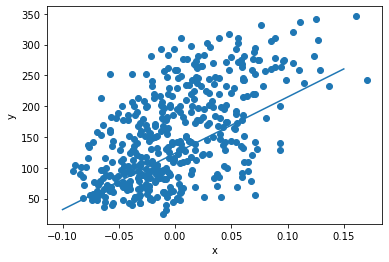

epochs = 560


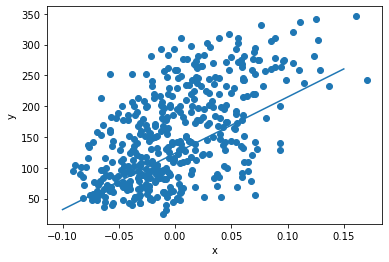

epochs = 570


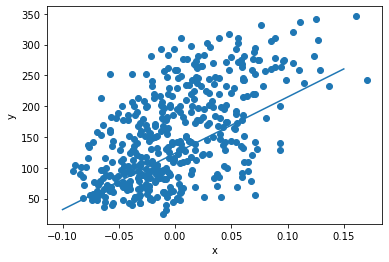

epochs = 580


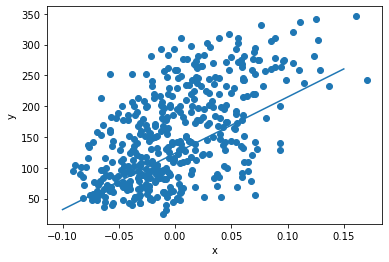

epochs = 590


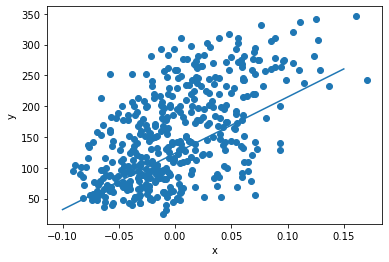

epochs = 600


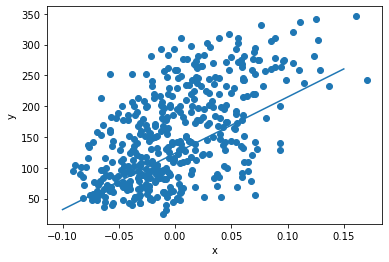

epochs = 610


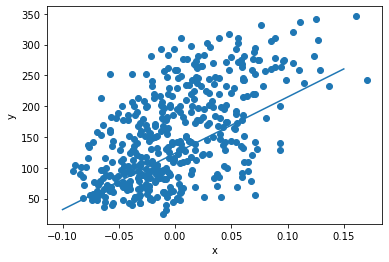

epochs = 620


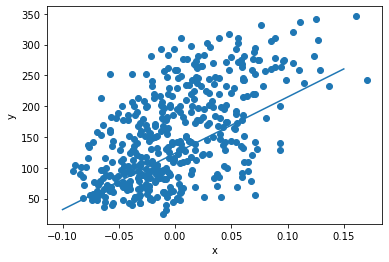

epochs = 630


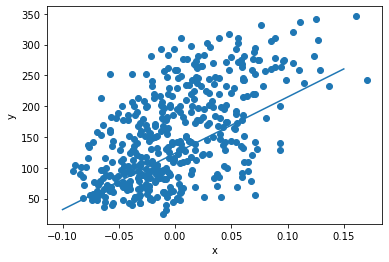

epochs = 640


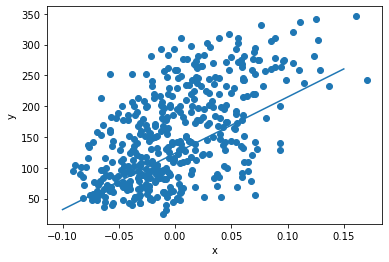

epochs = 650


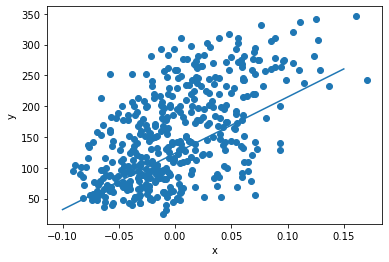

epochs = 660


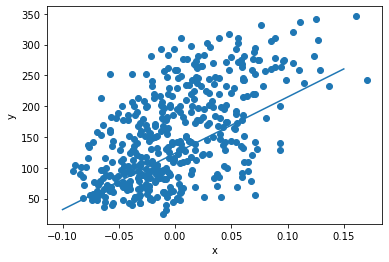

epochs = 670


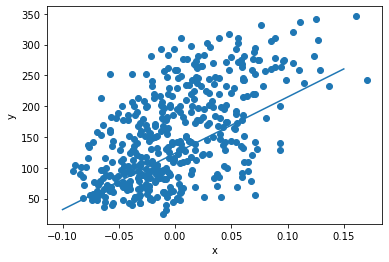

epochs = 680


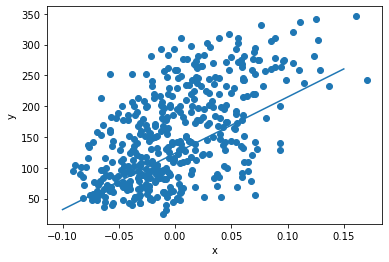

epochs = 690


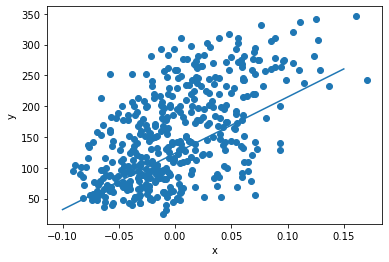

epochs = 700


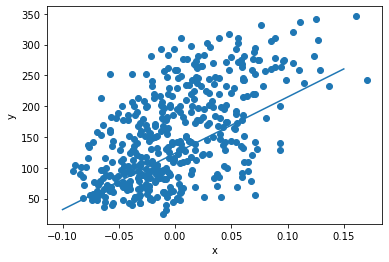

epochs = 710


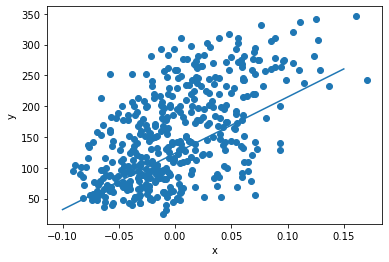

epochs = 720


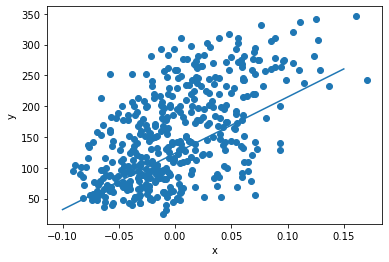

epochs = 730


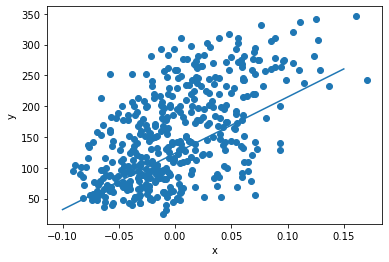

epochs = 740


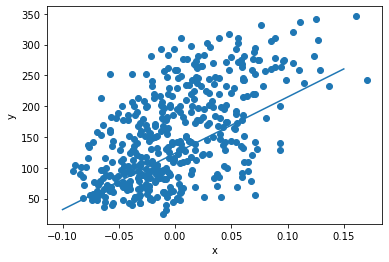

epochs = 750


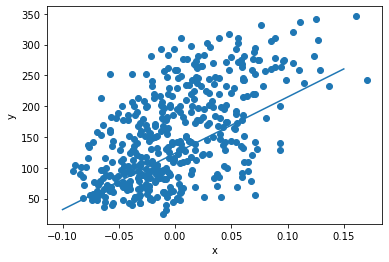

epochs = 760


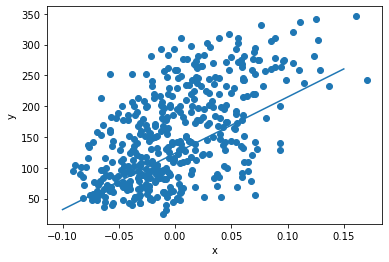

epochs = 770


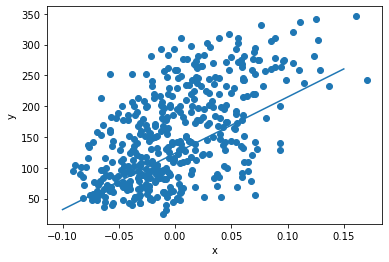

epochs = 780


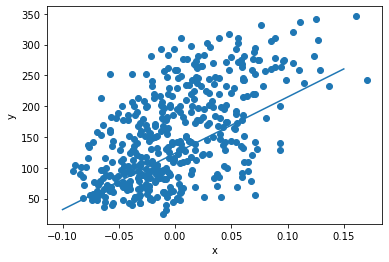

epochs = 790


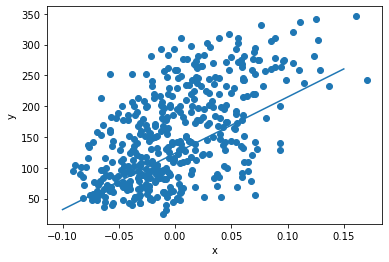

epochs = 800


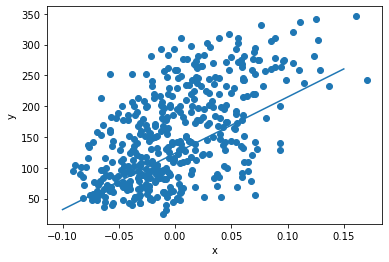

epochs = 810


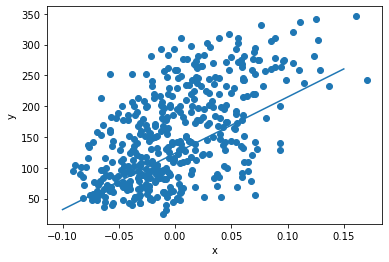

epochs = 820


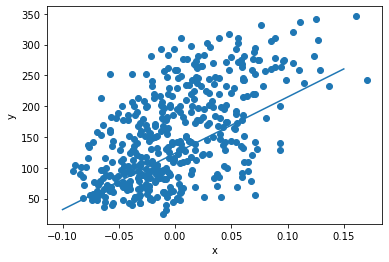

epochs = 830


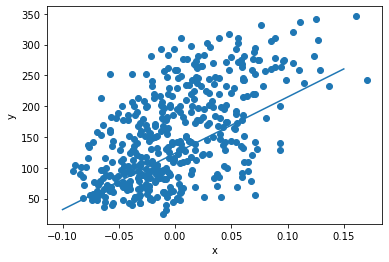

epochs = 840


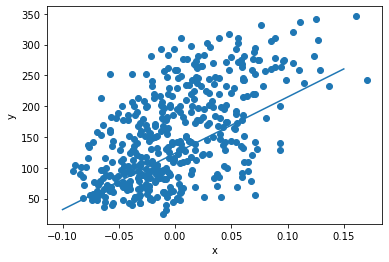

epochs = 850


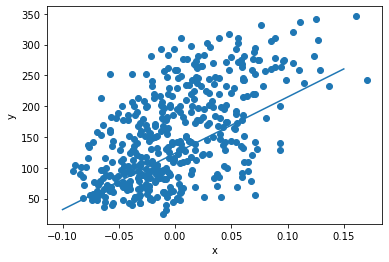

epochs = 860


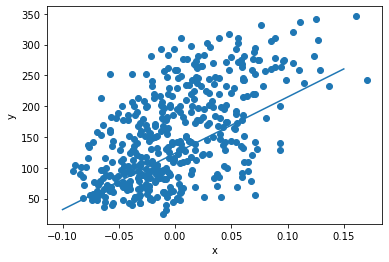

epochs = 870


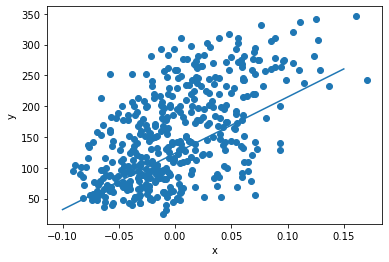

epochs = 880


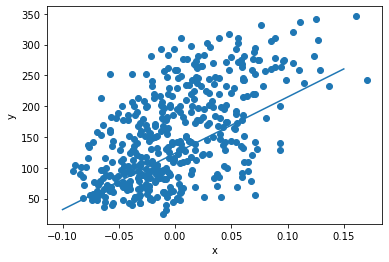

epochs = 890


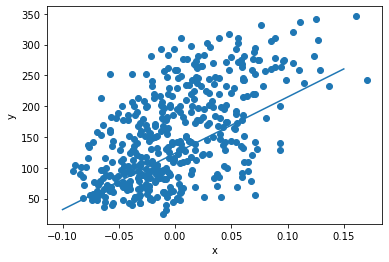

epochs = 900


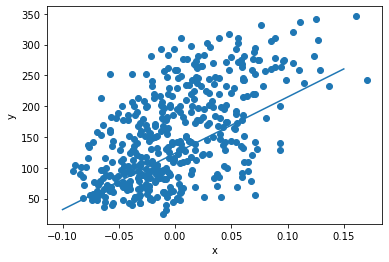

epochs = 910


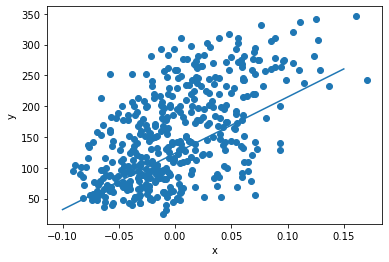

epochs = 920


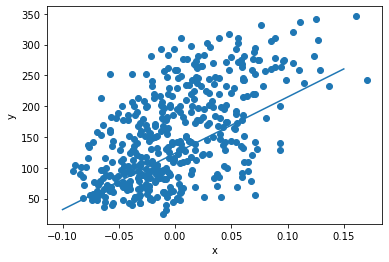

epochs = 930


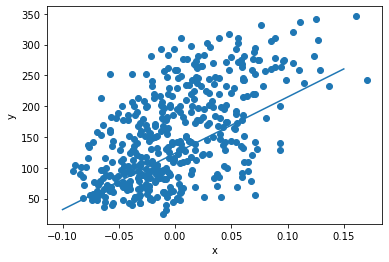

epochs = 940


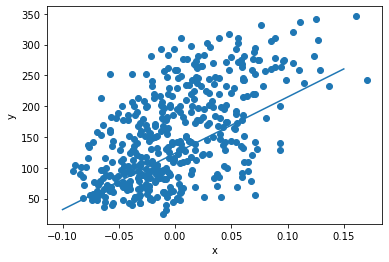

epochs = 950


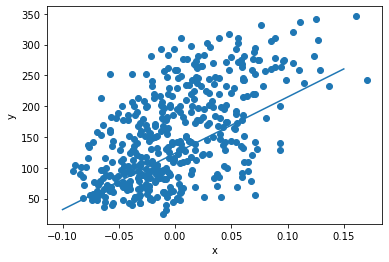

epochs = 960


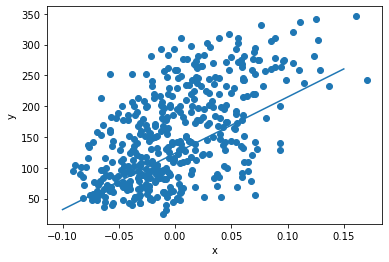

epochs = 970


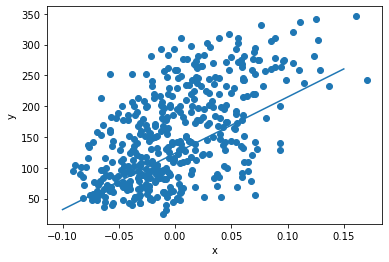

epochs = 980


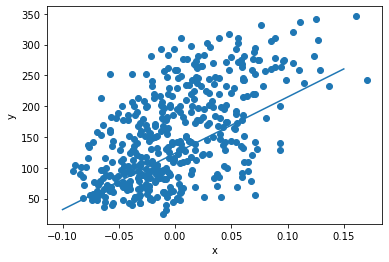

epochs = 990


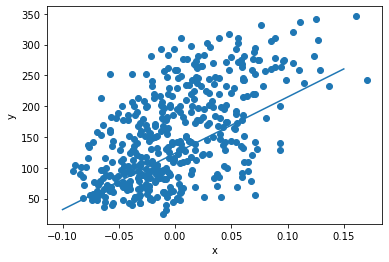

913.5973364345905 123.39414383177204


In [17]:
neuron = Neuron()
neuron.fit(x, y)

In [ ]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()